In [2]:
##EMBEDDINGS

## load & train

import numpy as np
import tensorflow as tf
import pandas as pd
import itertools as it

# Read data
words = pd.read_csv('headlines.zip').loc[lambda d: ~d['text'].isna()]['text'][:20_000]

def sliding_window(txt):
    for i in range(len(txt) - 1):
        txt = txt.replace(" ", "_")
        yield txt[i], txt[i + 1]

# Make sliding window
window = list(it.chain(*[sliding_window(_) for _ in words]))
mapping = {c: i for i, c in enumerate(pd.DataFrame(window)[0].unique())}

# Training data
integers_in = np.array([mapping[w[0]] for w in window])
integers_out = np.array([mapping[w[1]] for w in window]).reshape(-1, 1)


In [3]:
## embedding layer

from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pylab as plt

num_letters = len(mapping) # typically 36 -> 26 letters + 10 numbers

# this one is so we might grab the embeddings
model_emb = Sequential()
embedding = Embedding(num_letters, 2, input_length=1)
model_emb.add(embedding)

idx_to_calc = list(mapping.values())
idx_to_calc = np.array([idx_to_calc]).T

translator = {v:k for k,v in mapping.items()}
# Generate the 2d embeddings on an untrained network
preds = model_emb.predict(idx_to_calc)


2/2 [==============================] - 0s 6ms/step


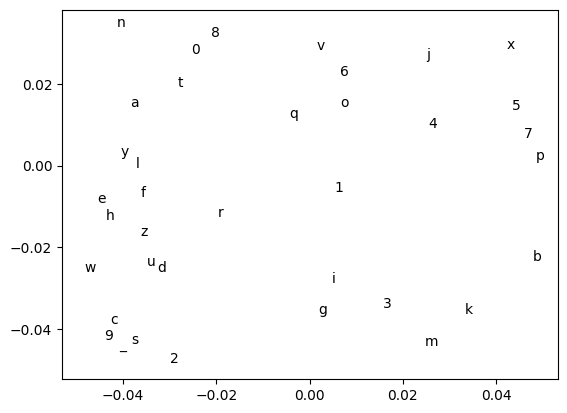

In [4]:
#plot

# Plot the 2d embeddings of each letter
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
      plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])


In [5]:
## model definition

from tensorflow.keras.optimizers import Adam

# this one is so we might learn the mapping
model_pred = Sequential()
model_pred.add(embedding)
model_pred.add(Flatten())
model_pred.add(Dense(num_letters, activation="softmax"))

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_pred.compile(adam, 'categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2/2 [==============================] - 0s 4ms/step


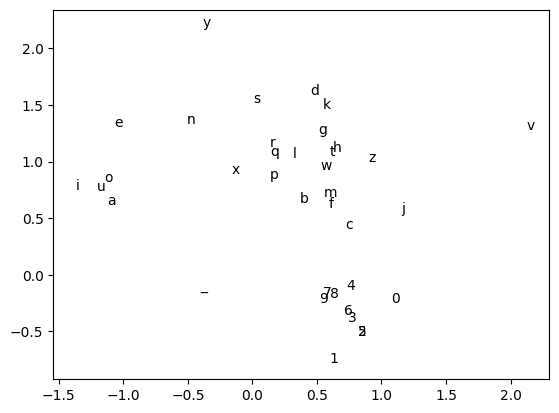

In [6]:
# new plot after one epoch

from sklearn.preprocessing import OneHotEncoder

to_predict = OneHotEncoder(sparse=False).fit_transform(integers_out)
model_pred.fit(integers_in, to_predict, epochs=1, verbose=1)

preds = model_emb.predict(idx_to_calc)
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
    plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])


In [ ]:
#### SCIKIT LEARN

In [22]:
from sklearn.datasets import fetch_california_housing as load_boston

In [23]:
X, y = load_boston(return_X_y=True)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)

mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)


array([2.826802, 2.1594  , 3.650404, ..., 1.2882  , 1.4418  , 1.7342  ])

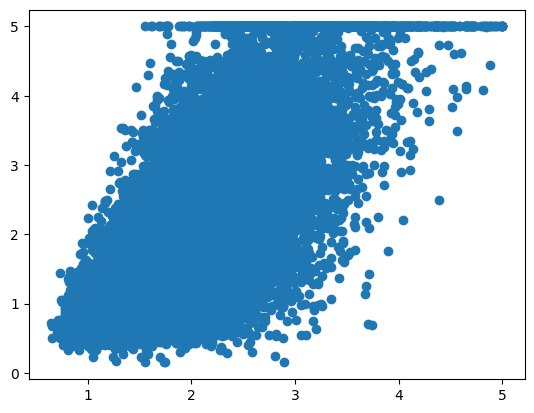

In [27]:

import matplotlib.pylab as plt

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)


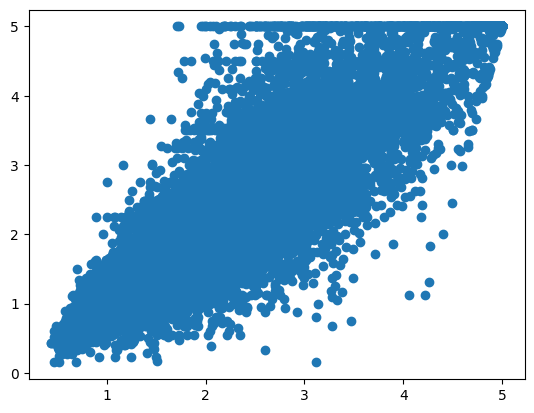

In [28]:

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline




pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)


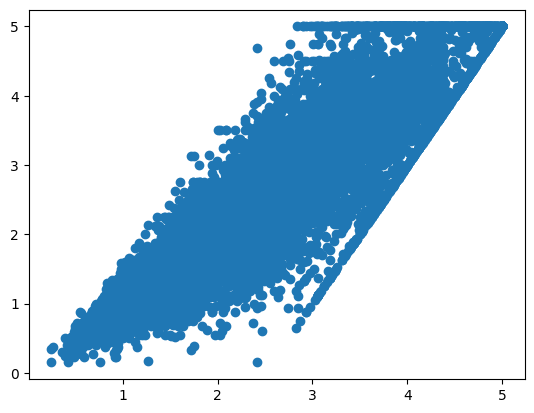

In [32]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=2))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

In [33]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                   param_grid={
                     'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                   },
                   cv=3)
mod.fit(X, y);


In [34]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020302,0.002796,0.310914,0.049697,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.016974,0.000110,0.315136,0.029203,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.023465,0.000705,0.549872,0.028049,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.016823,0.000071,0.344202,0.021106,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.016956,0.000093,0.364341,0.033517,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.017025,0.000284,0.375384,0.031738,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.039867,0.016151,0.808510,0.273289,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.025100,0.001050,0.774660,0.088832,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.020886,0.002909,0.457593,0.059191,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.017246,0.000399,0.412489,0.022381,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1
